Customer Segmentation

Mariyil Jocelyn Joseph

### Customer Segmentation using Mall Customer Segmentation Data

##### Step1:Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

##### Step2:Loading the data

In [ ]:
#Reading the excel file
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers_final.csv to Mall_Customers_final (3).csv


In [ ]:
import io
customer_data = pd.read_csv(io.BytesIO(uploaded['Mall_Customers_final.csv']))

Step3:Understanding the data

In [ ]:
#Total observations
print("Total observations-" , customer_data.shape)

Total observations- (200, 5)


There are 200 observations and 5 columns

In [ ]:
#First five observations
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Taking a look at the columns of the data
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
#taking a look at the datatypes of each columns
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Step4:Data Preprocessing

Checking for null values

In [ ]:
#Checking for null values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values in the dataframe

Boxplot

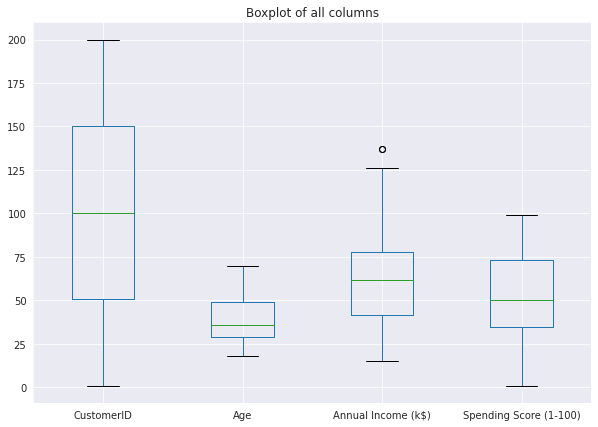

In [ ]:
#Boxplot 
customer_data.plot.box(title="Boxplot of all columns",figsize=(10,7))


This boxplot shows us that there is a outlier in the annual income column.

Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
for var in ["Age","Annual Income (k$)",'Spending Score (1-100)']:
    scaled_var="scaled_"+var
    model=scalar.fit(customer_data[var].values.reshape(-1,1))
    customer_data[scaled_var]=model.transform(customer_data[var].values.reshape(-1,1))

The algorithm should not be biased towards variables with higher magnitude. To overcome this problem, we can bring down all the variables to the same scale. Therefore, we transform features by scaling each feature to a given range.

##### Step4:Descriptive Analysis

In [ ]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),scaled_Age,scaled_Annual Income (k$),scaled_Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.400962,0.373443,0.502041
std,57.879185,13.969007,26.264721,25.823522,0.268635,0.215285,0.263505
min,1.000000,18.000000,15.000000,1.000000,0.000000,0.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.206731,0.217213,0.344388
50%,100.500000,36.000000,61.500000,50.000000,0.346154,0.381148,0.500000
75%,150.250000,49.000000,78.000000,73.000000,0.596154,0.516393,0.734694
max,200.000000,70.000000,137.000000,99.000000,1.000000,1.000000,1.000000


In [ ]:
#Correlation
customer_data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),scaled_Age,scaled_Annual Income (k$),scaled_Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,-0.327227,0.009903,1.000000
scaled_Age,-0.026763,1.000000,-0.012398,-0.327227,1.000000,-0.012398,-0.327227
scaled_Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,-0.012398,1.000000,0.009903
scaled_Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,-0.327227,0.009903,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

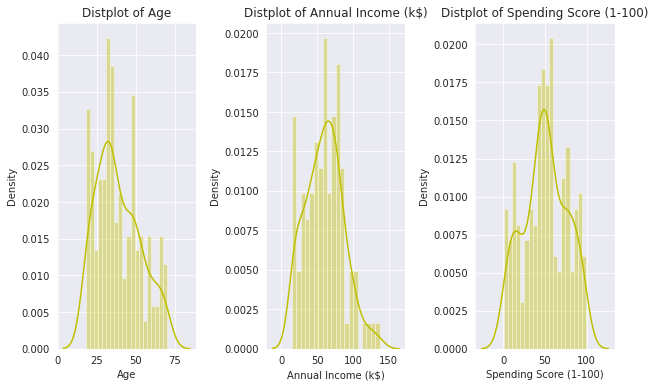

In [ ]:
#Density plots
plt.figure(1,figsize=(10,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(customer_data[x],bins=20,color='y')
    plt.title('Distplot of {}'.format(x))
plt.show()

Age and Annual Income are slightly skewed to the right, and Spending Score is nearly normally distributed.


##### Step 5:Exploratory data analysis

##### 1.Gender Analysis

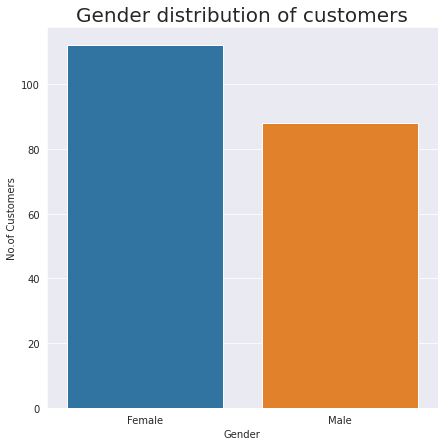

In [ ]:
genders = customer_data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(7,7))
p=sns.barplot(x=genders.index, y=genders.values)
p.set_xlabel("Gender", fontsize = 10)
p.set_ylabel("No.of Customers", fontsize = 10)
plt.title('Gender distribution of customers',fontsize = 20)
plt.show()

From the gender analysis we did, it is clear that the dataset had more observations from female customers than the male customers.


##### 2.Age

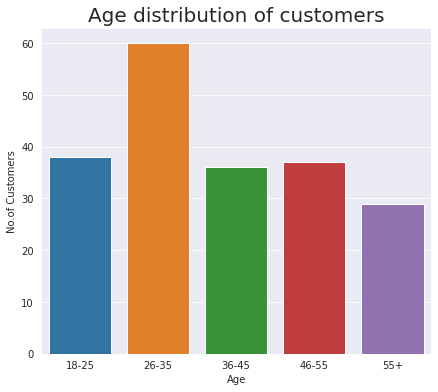

In [ ]:
age18_25 = customer_data.Age[(customer_data.Age <= 25) & (customer_data.Age >= 18)]
age26_35 = customer_data.Age[(customer_data.Age <= 35) & (customer_data.Age >= 26)]
age36_45 = customer_data.Age[(customer_data.Age <= 45) & (customer_data.Age >= 36)]
age46_55 = customer_data.Age[(customer_data.Age <= 55) & (customer_data.Age >= 46)]
age55above = customer_data.Age[customer_data.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(7,6))
sns.barplot(x=x, y=y)
plt.title("Age distribution of customers",fontsize = 20)
plt.xlabel("Age")
plt.ylabel("No.of Customers")
plt.show()

From the above bar graph it is clear that the customers having age between 26 and 35 visited the malls the most as compared to other age groups.

##### 3.Spending Score

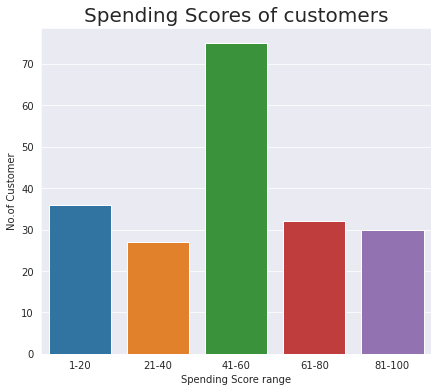

In [ ]:
ss1_20 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 1) & (customer_data["Spending Score (1-100)"] <= 20)]
ss21_40 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 21) & (customer_data["Spending Score (1-100)"] <= 40)]
ss41_60 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 41) & (customer_data["Spending Score (1-100)"] <= 60)]
ss61_80 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 61) & (customer_data["Spending Score (1-100)"] <= 80)]
ss81_100 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 81) & (customer_data["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(7,6))
sns.barplot(x=score_x, y=score_y)
plt.title("Spending Scores of customers",fontsize = 20)
plt.xlabel("Spending Score range")
plt.ylabel("No.of Customer")
plt.show()

From the above bar graph, it can be observed that most of the people had a spending score between 40 and 60.



##### 4.Annual Income

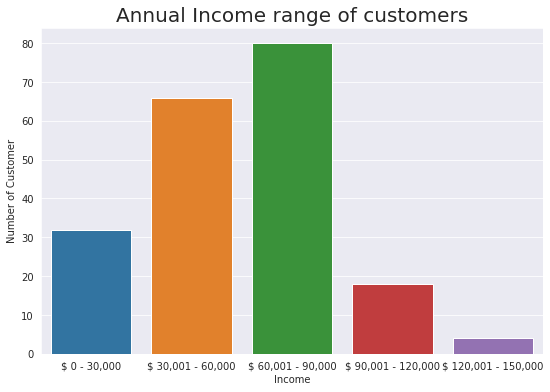

In [ ]:
ai0_30 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 0) & (customer_data["Annual Income (k$)"] <= 30)]
ai31_60 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 31) & (customer_data["Annual Income (k$)"] <= 60)]
ai61_90 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 61) & (customer_data["Annual Income (k$)"] <= 90)]
ai91_120 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 91) & (customer_data["Annual Income (k$)"] <= 120)]
ai121_150 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 121) & (customer_data["Annual Income (k$)"] <= 150)]

income_x = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(9,6))
sns.barplot(x=income_x, y=income_y)
plt.title("Annual Income range of customers",fontsize=20)
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

From the above bar graph, it can be observed that most of the people had annual income between 60-90K dollars while only few customers earn more than 90K dollars.


##### Correlation plot

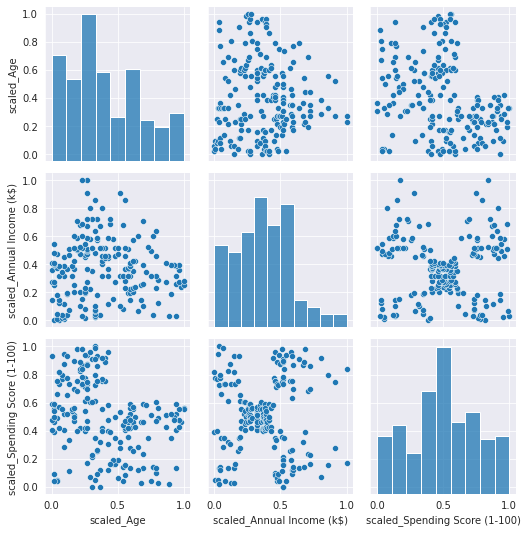

In [ ]:
import seaborn as sns
columns=["scaled_Age","scaled_Annual Income (k$)","scaled_Spending Score (1-100)"]
sns.pairplot(customer_data[columns])


For the scatter plots, there is no clear correlation between features.


# Clustering based on 2 features

In [ ]:
#We take just the Annual Income and Spending score
df1=customer_data[["CustomerID","Gender","scaled_Age","scaled_Annual Income (k$)","scaled_Spending Score (1-100)"]]

X=df1[["scaled_Annual Income (k$)","scaled_Spending Score (1-100)"]]

In [ ]:
#The input data

X.head()

,scaled_Annual Income (k$),scaled_Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


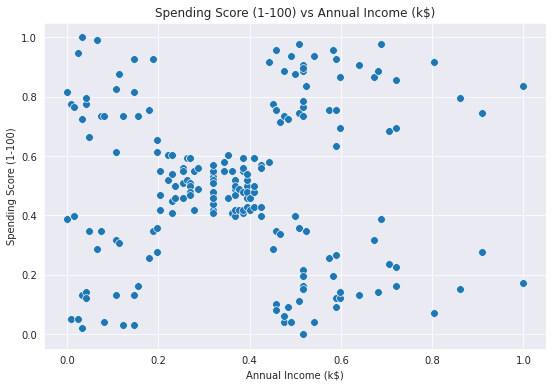

In [ ]:
#Scatterplot of the input data

plt.figure(figsize=(9,6))
sns.scatterplot(x = 'scaled_Annual Income (k$)',y = 'scaled_Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

There seems to be some patterns in the data.

In [ ]:
#Importing KMeans from sklearn

from sklearn.cluster import KMeans

Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
Next, we choose the k for which WSS first starts to diminish. 

In [ ]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

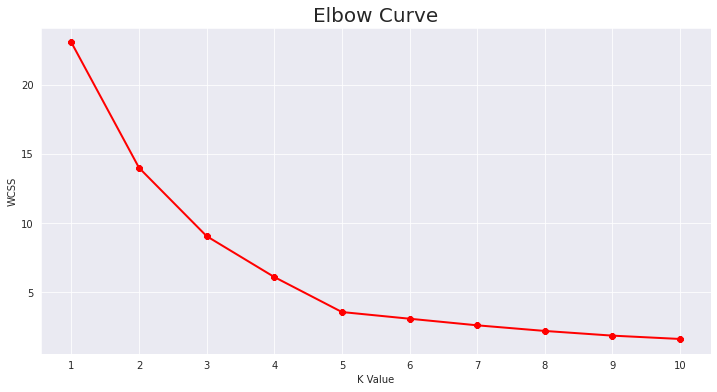

In [ ]:

#The elbow curve

plt.figure(figsize=(12,6))

plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")

plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.title("Elbow Curve",fontsize=20)

plt.show()

In [ ]:
#this is known as the elbow graph , the x axis being the number of clusters
#the number of clusters is taken at the elbow joint point
#this point is the point where making clusters is most relevant
#the numbers of clusters is kept at maximum

In [ ]:
#Taking 5 clusters

km1=KMeans(n_clusters=5)

In [ ]:
#Fitting the input data

km1.fit(X)

KMeans(n_clusters=5)

In [ ]:
#predicting the labels of the input data

y=km1.predict(X)

In [ ]:
#adding the labels to a column named label

df1["label"] = y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#The new dataframe with the clustering done

df1.head(5)

,CustomerID,Gender,scaled_Age,scaled_Annual Income (k$),scaled_Spending Score (1-100),label
0,1,Male,0.019231,0.000000,0.387755,4
1,2,Male,0.057692,0.000000,0.816327,3
2,3,Female,0.038462,0.008197,0.051020,4
3,4,Female,0.096154,0.008197,0.775510,3
4,5,Female,0.250000,0.016393,0.397959,4


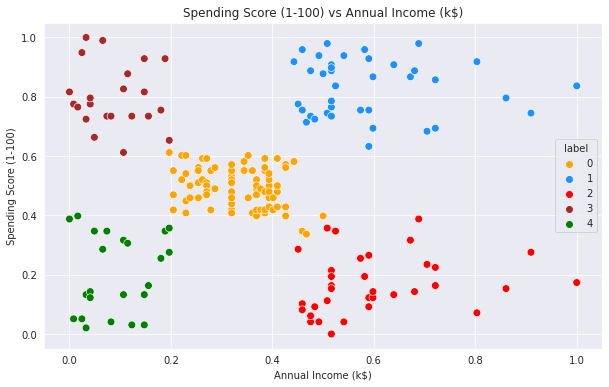

In [ ]:
#Scatterplot of the clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'scaled_Annual Income (k$)',y = 'scaled_Spending Score (1-100)',hue="label",  
                 palette=['orange','dodgerblue','red','brown','green'], legend='full',data = df1  ,s = 60 )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

Now printing the customer ID according to the groups

In [ ]:
cust1=df1[df1["label"]==0]
print('Number of customer in 1st group=', len(cust1))
print('They are general customers-', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df1[df1["label"]==1]
print('Number of customer in 2nd group=', len(cust2))
print('They are miser customers-', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df1[df1["label"]==2]
print('Number of customer in 3rd group=', len(cust3))
print('They are spendthrift customers -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are careful customers -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are target customers-', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 81
They are general customers- [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
--------------------------------------------
Number of customer in 2nd group= 39
They are miser customers- [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 3rd group= 35
They are spendthrift customers - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer in 4th group= 22
T

##### Based on Age

In [ ]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'scaled_Age', 'scaled_Annual Income (k$)',
       'scaled_Spending Score (1-100)'],
      dtype='object')

In [ ]:
x = customer_data.iloc[:, [2, 4]].values
x.shape

(200, 2)

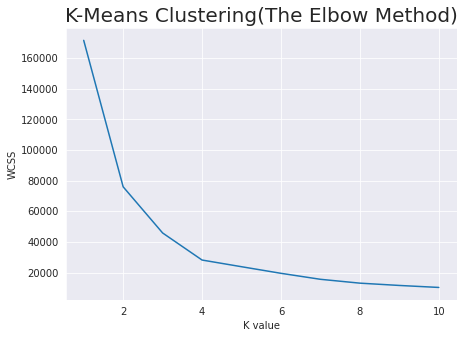

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

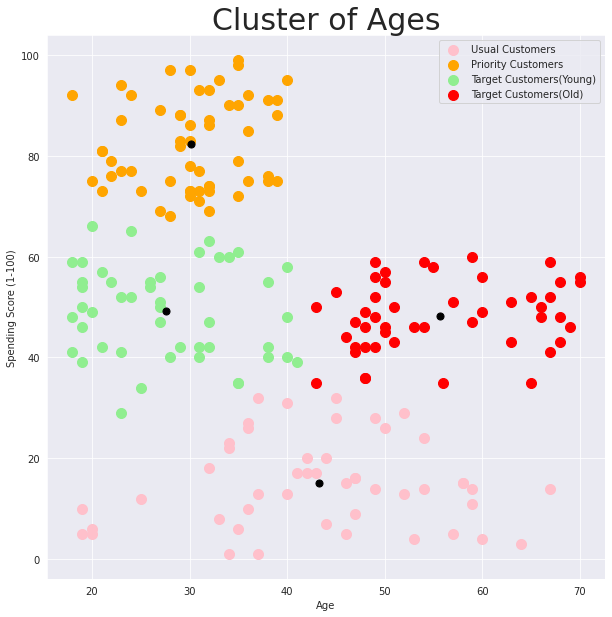

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### 3features

In [ ]:
df2=customer_data[["CustomerID","Gender","scaled_Age","scaled_Annual Income (k$)","scaled_Spending Score (1-100)"]]


In [ ]:
X2=df2[["scaled_Annual Income (k$)","scaled_Spending Score (1-100)","scaled_Age"]]

In [ ]:
wcss2=[]

for i in range(1,11):
    km2=KMeans(n_clusters=i)
    km2.fit(X2)
    wcss2.append(km2.inertia_)

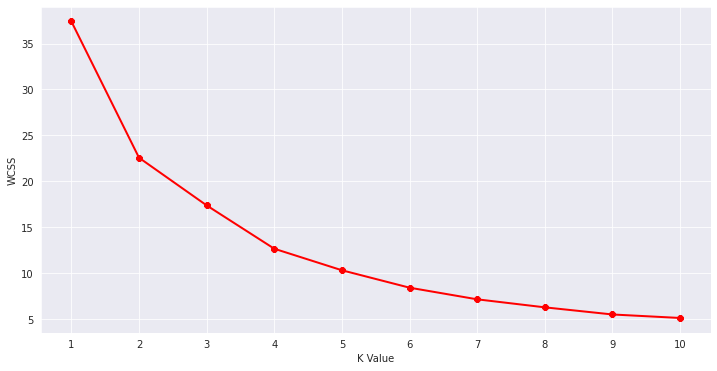

In [ ]:
#The elbow curve

plt.figure(figsize=(12,6))

plt.plot(range(1,11),wcss2, linewidth=2, color="red", marker ="8")

plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

plt.show()

In [ ]:
#Taking 5 clusters

km2=KMeans(n_clusters=5)

In [ ]:
#Fitting the input data

km2.fit(X2)

KMeans(n_clusters=5)

In [ ]:
#predicting the labels of the input data

y2=km2.predict(X2)

In [ ]:
#adding the labels to a column named label

df2["label"]= y2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#The new dataframe with the clustering done

df2.head(5)

,CustomerID,Gender,scaled_Age,scaled_Annual Income (k$),scaled_Spending Score (1-100),label
0,1,Male,0.019231,0.000000,0.387755,3
1,2,Male,0.057692,0.000000,0.816327,4
2,3,Female,0.038462,0.008197,0.051020,3
3,4,Female,0.096154,0.008197,0.775510,4
4,5,Female,0.250000,0.016393,0.397959,3


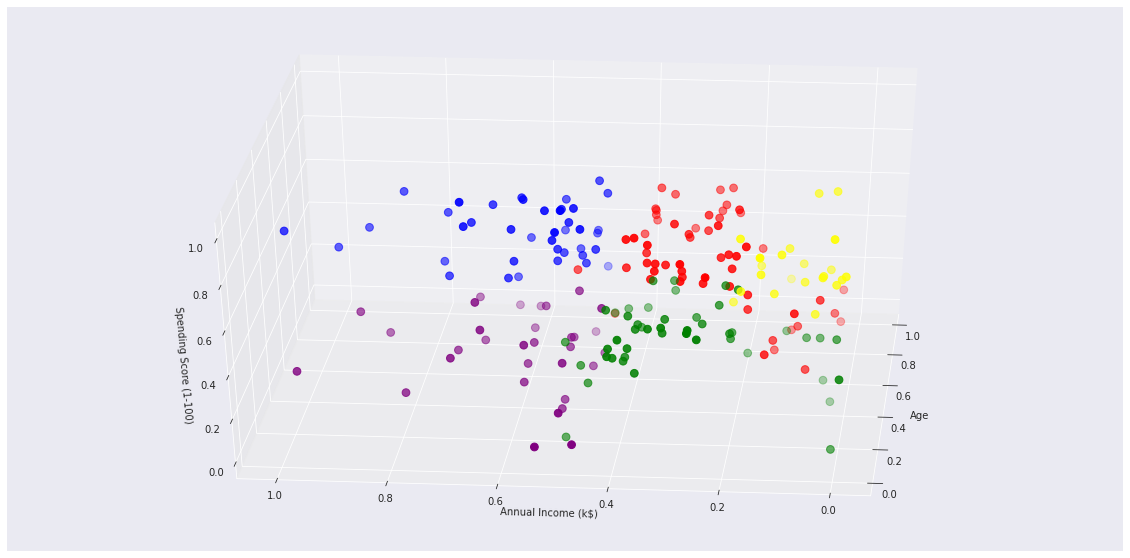

In [ ]:
#3D Plot as we did the clustering on the basis of 3 input features

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.scaled_Age[df2.label == 0], df2["scaled_Annual Income (k$)"][df2.label == 0], df2["scaled_Spending Score (1-100)"][df2.label == 0], c='purple',s=60)
ax.scatter(df2.scaled_Age[df2.label == 1], df2["scaled_Annual Income (k$)"][df2.label == 1], df2["scaled_Spending Score (1-100)"][df2.label == 1], c='red',s=60)
ax.scatter(df2.scaled_Age[df2.label == 2], df2["scaled_Annual Income (k$)"][df2.label == 2], df2["scaled_Spending Score (1-100)"][df2.label == 2], c='blue',s=60)
ax.scatter(df2.scaled_Age[df2.label == 3], df2["scaled_Annual Income (k$)"][df2.label == 3], df2["scaled_Spending Score (1-100)"][df2.label == 3], c='green',s=60)
ax.scatter(df2.scaled_Age[df2.label == 4], df2["scaled_Annual Income (k$)"][df2.label == 4], df2["scaled_Spending Score (1-100)"][df2.label == 4], c='yellow',s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()